In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
lmbda = 3 # speed
mu = 1 # mean
sigma = 0.5 # vol
x0 = 3 # intial val
T = 5 # total time step
dt = 0.25 # time step
N = int(T / dt)



In [114]:
X = np.zeros(N)
X[0] = x0

In [115]:
for t in range(1,N):
    dw = np.sqrt(dt)*np.random.normal(0,1)
    X[t] = X[t-1] + lmbda*(mu-X[t-1])*dt + sigma*dw

Text(0.5, 1.0, 'OU Process Simulation')

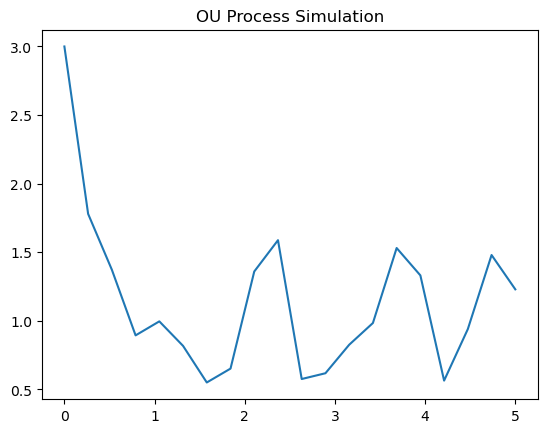

In [116]:
plt.plot(np.linspace(0,T,N),X)
plt.title("OU Process Simulation")

### Calibrate OU process using regression 

In [117]:
import pandas as pd
import numpy as np
import ISLP
import matplotlib.pyplot as plt
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t
from math import sqrt
from statsmodels.graphics.gofplots import ProbPlot
import seaborn as sns


In [118]:
Y = np.linspace(0,T,N)
df = pd.DataFrame({'X' : X , 'Y' : X})

In [119]:
df

,X,Y
0,3.000000,3.000000
1,1.779892,1.779892
2,1.372742,1.372742
3,0.894269,0.894269
4,0.996351,0.996351
5,0.817752,0.817752
6,0.550937,0.550937
7,0.652120,0.652120
8,1.359799,1.359799
9,1.588082,1.588082


In [120]:
df.X = df.X.shift(1)

In [121]:
df.dropna(inplace=True)
df = sm.add_constant(df)
df

,const,X,Y
1,1.0,3.000000,1.779892
2,1.0,1.779892,1.372742
3,1.0,1.372742,0.894269
4,1.0,0.894269,0.996351
5,1.0,0.996351,0.817752
6,1.0,0.817752,0.550937
7,1.0,0.550937,0.652120
8,1.0,0.652120,1.359799
9,1.0,1.359799,1.588082
10,1.0,1.588082,0.576204


In [122]:
model = sm.OLS(df['Y'], df[['const','X']]).fit()

In [123]:
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     5.654
Date:                Sat, 10 May 2025   Prob (F-statistic):             0.0294
Time:                        16:20:59   Log-Likelihood:                -5.8724
No. Observations:                  19   AIC:                             15.74
Df Residuals:                      17   BIC:                             17.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6786      0.178      3.806      0.001       0.302       1.055
X              0.3294      0.139      2.378      0.029       0.037       0.622
==============================================================================
Omnibus:                        0.237   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.427
Skew:                          -0.070   Prob(JB):                        0.808
Kurtosis:                       2.279   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
a = 0.3294 
b = 0.6786
eps = model.resid
sd_eps = np.var(eps)

In [128]:
clmbda = - np.log(a)/dt
cmu = b/(1-a)
csigma = sd_eps*np.sqrt(-2*np.log(a)/(dt*(1-a**2)))

In [129]:
print(clmbda)
print(cmu)
print(csigma)

4.441929844954388
1.0119296152699075
0.3429470307599599
